***Final Project***

Nathan Pierce

Tarek Darwiche

Jeremy Schroeder


This database contains information about various factors affecting wine quality, as well as a quality score for each wine. It has 11 different factors that can affect the quality score. Although Logistic Regression would be best because this is a classification project, we have decided to use multiple linear regression to test how accurate it is.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
wine = pd.read_csv('redwinequality.csv')
vino = pd.DataFrame()

In [20]:

wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


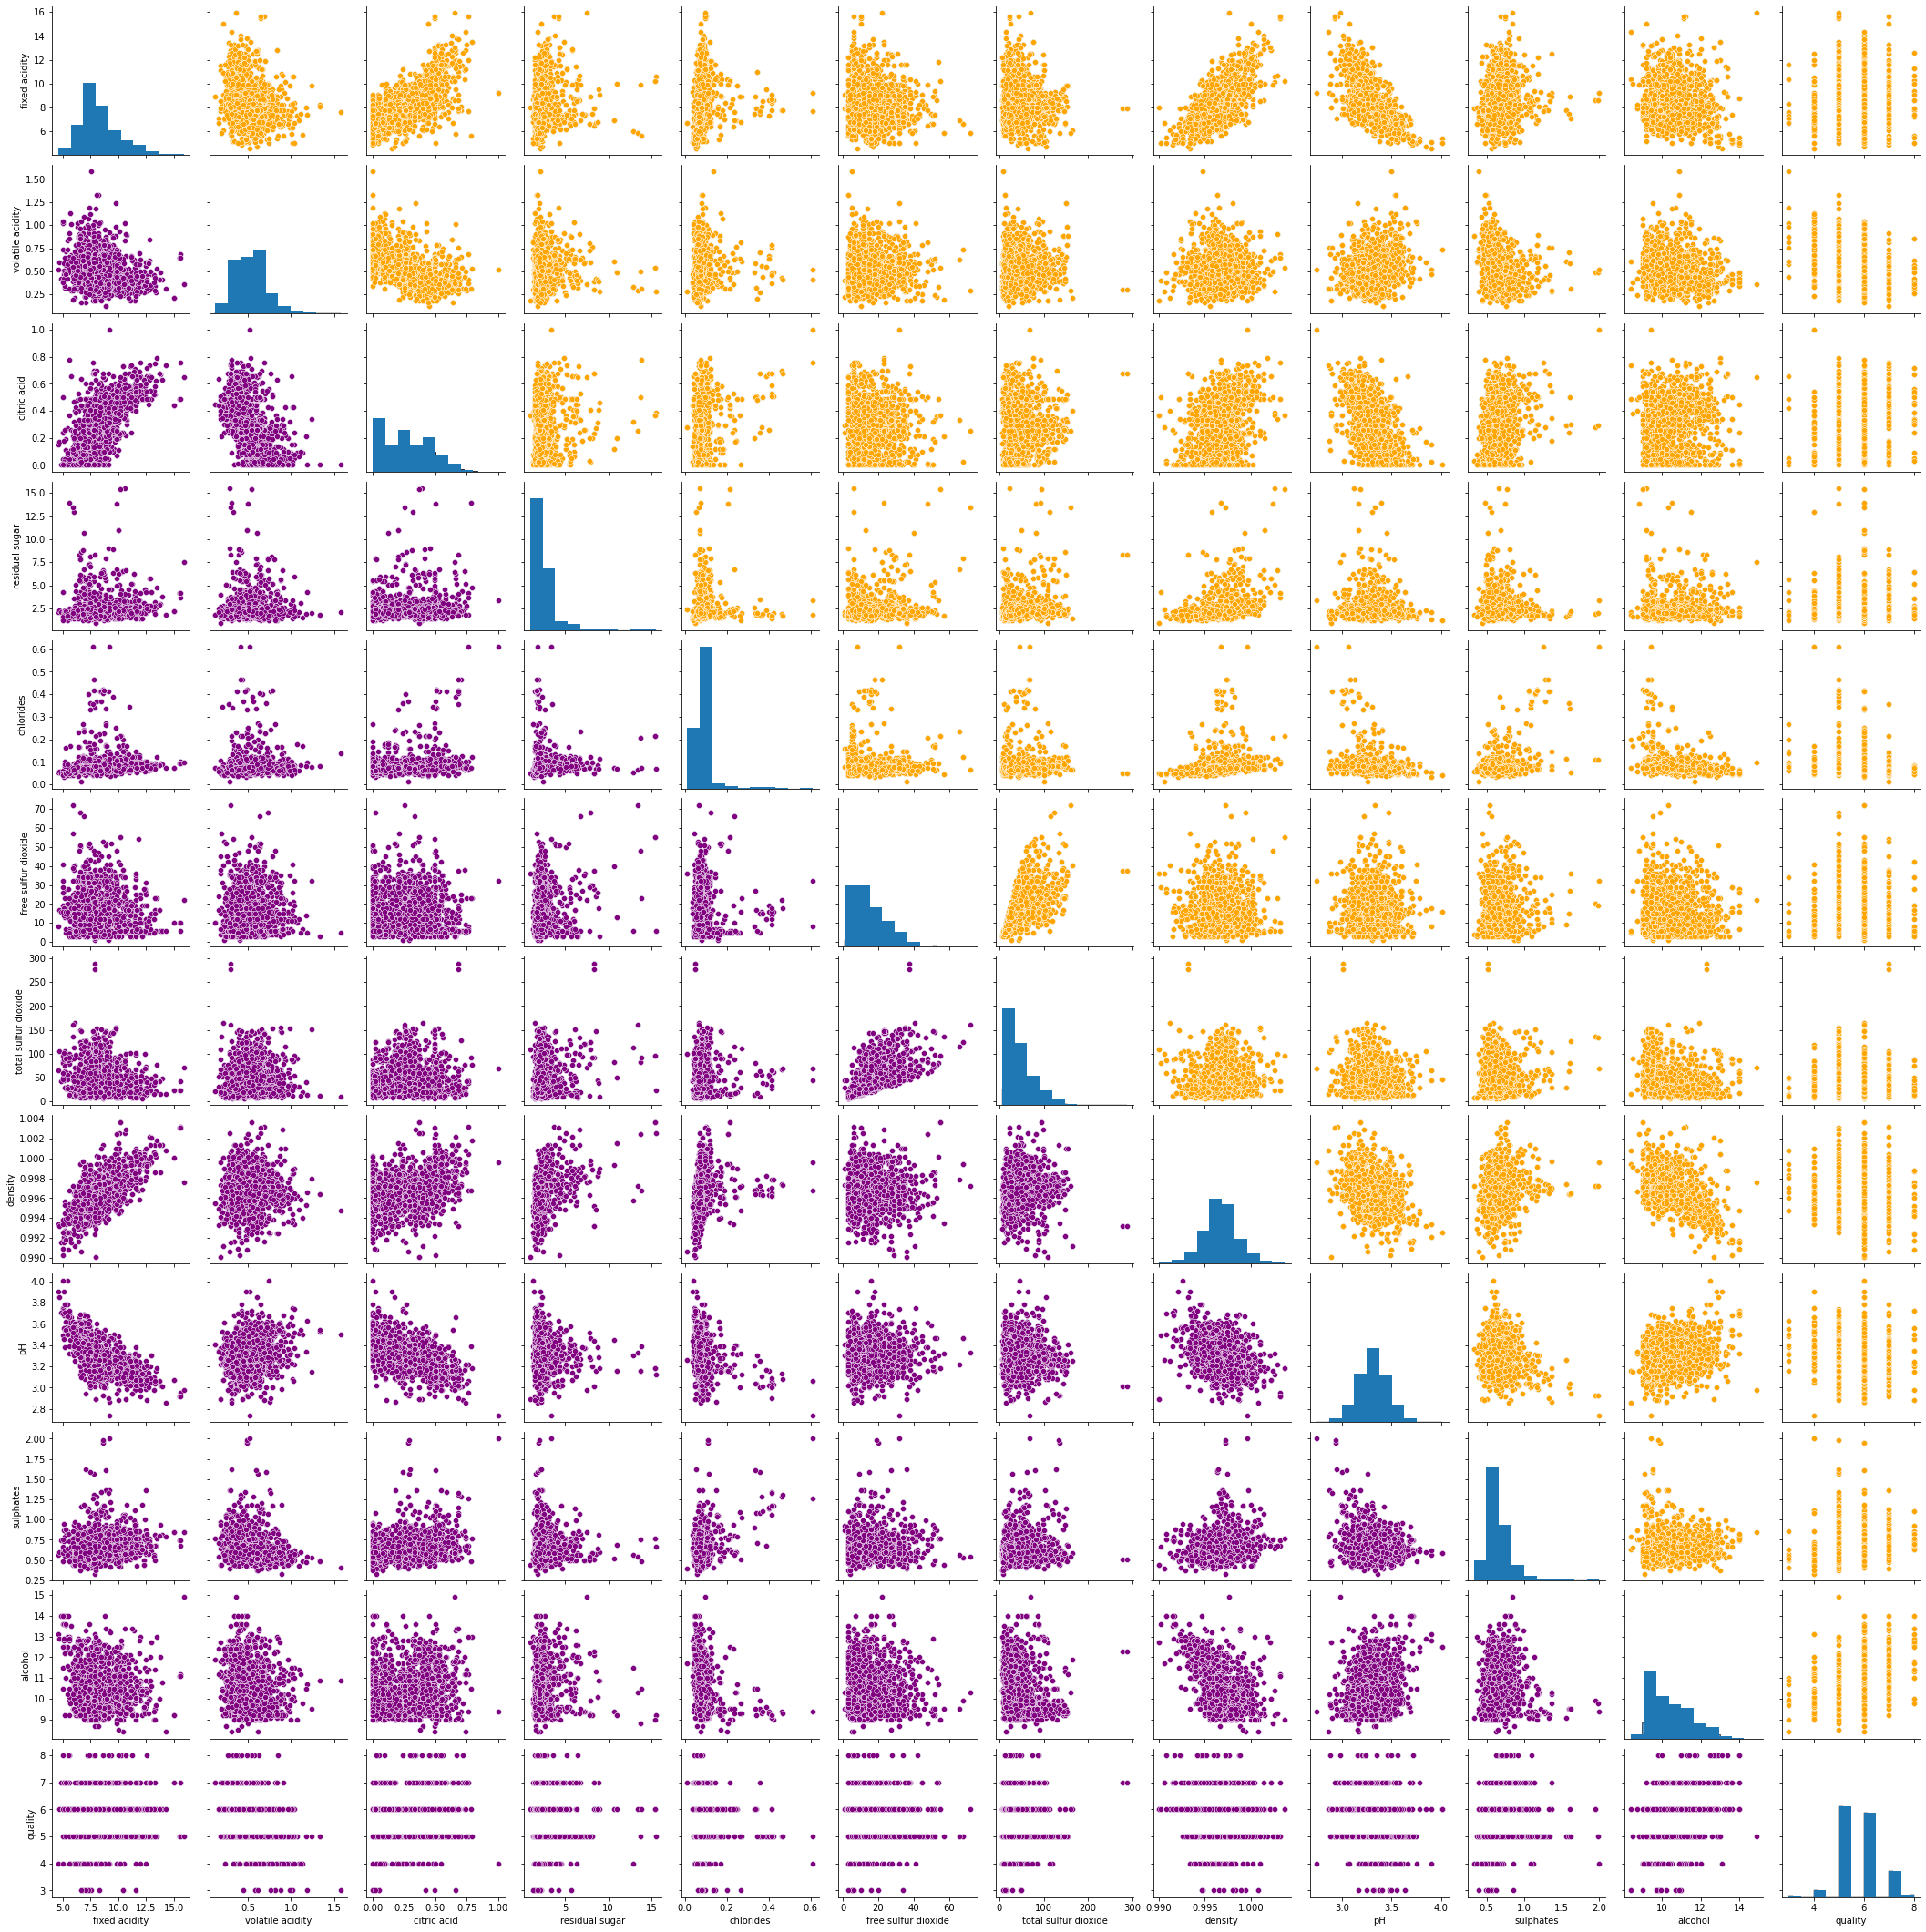

In [22]:
a = sns.pairplot(wine)
a.map_upper(sns.scatterplot,color='orange')
a.map_lower(sns.scatterplot, color='purple')
a.map_diag(plt.hist)


In [23]:
#Mutliple Linear Regression
def standard(x):
    y = x-x.mean()/x.std()
    return y

for (columnName, columnData) in wine.iteritems():
    vino[columnName] = standard(columnData)
    
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.62161,-2.247735,-1.391037,0.099337,-1.782408,9.482344,32.587404,-527.126371,-17.936914,-3.322724,-0.380708,-1.978994
1,3.02161,-2.067735,-1.391037,0.799337,-1.760408,23.482344,65.587404,-527.127371,-18.246914,-3.202724,0.019292,-1.978994
2,3.02161,-2.187735,-1.351037,0.499337,-1.766408,13.482344,52.587404,-527.127171,-18.186914,-3.232724,0.019292,-1.978994
3,6.42161,-2.667735,-0.831037,0.099337,-1.783408,15.482344,58.587404,-527.126171,-18.286914,-3.302724,0.019292,-0.978994
4,2.62161,-2.247735,-1.391037,0.099337,-1.782408,9.482344,32.587404,-527.126371,-17.936914,-3.322724,-0.380708,-1.978994


In [55]:
random = vino.sample(1599, replace = False)
training_set = random.iloc[0:1065, :]
test_set = random.iloc[1065:, :]
x_train = training_set.iloc[:, 0:10].values
y_train = training_set.iloc[:, 10].values
y_train = np.reshape(y_train, (len(y_train), 1))
x_test = test_set.iloc[:, 0:10].values
y_test = test_set.iloc[:, 10].values
y_test = np.reshape(y_test, (len(y_test), 1))
x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
theta = np.zeros((11,1))

print(np.shape(x_train_Aug))
x_train_Aug[1]

(11, 1065)


array([2.92160998, 2.42160998, 6.72160998, ..., 5.22160998, 4.62160998,
       1.22160998])

In [ ]:
no_of_iter = np.arange(1,100001)
alpha = 0.001
m_train = len(x_train)
m_test = len(x_test)

costfunc = []

#Iteration loop
for i in no_of_iter:
    z = np.transpose(theta)@x_train_Aug #Hypothesis function
    #print('z',z)
    cf = (1/(2*m_train))*(np.sum((np.transpose(z)-y_train)**2)) #Cost function
    #print('cf',cf)
    costfunc.append(cf) #Appending cost function
    #print('costfunc',costfunc)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(z)-y_train)) #Derivative of cost function
    #print('delthetaj',delthetaj)
    theta = theta - (alpha*delthetaj) #Updating theta values
    #print('theta',theta)

In [ ]:
theta

In [64]:
h_theta = np.transpose(theta)@x_train_Aug
y_train_pred = np.transpose(h_theta)

#plt.scatter(y_train, y_train_pred, color='r')
#plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
#plt.xlabel("Y_train")
#plt.ylabel("Y_train_pred")
#plt.title("Predictions vs. actual values in the training set")

In [10]:
wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
699,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.9986,3.11,0.62,10.8,6


In [67]:
u1 = float(input("User Input One: "))
u2 = float(input("User Input Two: "))
u3 = float(input("User Input Three: "))
u4 = float(input("User Input 4: "))
u5 = float(input("User Input 5: "))
u6 = float(input("User Input 6: "))
u7 = float(input("User Input 7: "))
u8 = float(input("User Input 8: "))
u9 = float(input("User Input 9: "))
u10 = float(input("User Input 10: "))
u11 = float(input("User Input 11: "))

output= theta[0]*u1 + theta[1]*u2 + theta[2]*u3 + theta[3]*u4 + theta[4]*u5 + theta[5]*u6 + theta[6]*u7 + theta[7]*u8 + theta[8]*u9 + theta[9]*u10+ + theta[10]*u11
print(output)

KeyboardInterrupt: Interrupted by user

In [66]:
gb=output*wine['quality'].std() + wine['quality'].mean() #converting quality from standard units to regular
print('Prediction value if wine is good or bad.',gb)
if gb>=.5:
    print('This is a good wine.')
elif gb<.5:
    print('This is a bad wine.')

Prediction value if wine is good or bad. [nan]


In [218]:
#Skikit Learn
x = wine.iloc[:, 0:11]
y = wine['quality']

print(x.head(),'\n\n*************\n')
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4   

******

In [219]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x.astype(float))
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [221]:
#Splitting the dataset into training set and the test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

In [222]:
#Training the model based on 'x_train and y_train' and getting the coefficients and the intercept

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.coef_)
print(lm.intercept_)

[ 0.06920113 -0.20925163 -0.06274708  0.06408486 -0.11092671  0.05599486
 -0.12674931 -0.07008192 -0.06686287  0.18142304  0.28652503]
5.637936529124566


Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

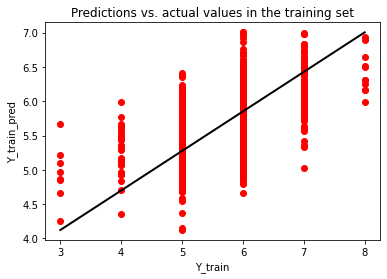

In [223]:
#Testing the model on the training set

y_train_pred = lm.predict(x_train)

plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

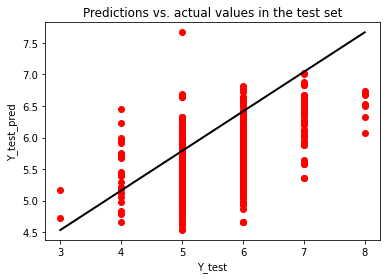

In [224]:
#Testing the model on the test set

y_test_pred = lm.predict(x_test)

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

In [225]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)   
                                       
print(MSE_train)
print(RMSE_train)

0.39891703497778336
0.6315987927298337


In [226]:
#Computing the MSE and the RMSE values for the predictions made on the test set

MSE_test = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)  

print(MSE_test)
print(RMSE_test)

0.46043801343845003
0.6785558292715862


In [68]:
"""
taken and edited from https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/
for (columnName, columnData) in stu_df.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.values)


arr = []
for (columnName, columnData) in Red_Wine.drop(columns = 'quality').iteritems():
    user_input = float(input("Enter a value for {}".format(columnName)))
    arr.append(user_input)
"""

'\ntaken and edited from https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/\nfor (columnName, columnData) in stu_df.iteritems():\n    print(\'Column Name : \', columnName)\n    print(\'Column Contents : \', columnData.values)\n\n\narr = []\nfor (columnName, columnData) in Red_Wine.drop(columns = \'quality\').iteritems():\n    user_input = float(input("Enter a value for {}".format(columnName)))\n    arr.append(user_input)\n'